## **DIFFERENTIAL PRIVACY BITES**

##### ***The promise of differential privacy***
"You will not be affected ... by allowing your data to be used inany study or analysis, no matter what other studies, data sets,or information sources, are available.” (C. Dwork)

##### ***Randomized Response***

How do we protect the privacy for a certain response, for instance if we want to make a survey? Let's assume we have a question with a binary outcome "Yes/No". For example "Did you cheat in an exam at university?" 
In this case, we are not really interested in who cheated, but how many people did. For instance, if we have a population of students in the campus, we may be interested in general statistics. However, the question is quite private, so we want to protect each answer. 

A solution to this could be a mechanism called *randomized response.*
We could tell our population the following, as Cynthia Dwork said: "Flip a coin one time. If the flip is head, then answer honestly. If it is tail, then flip a second coin. If the second coin flip is head, then answer yes, otherwise, answer no".

In this case, we have an answer which is biased towards the truth. 
Obviously, the more samples we have, the better we are to estimate the truth answer. 

We can also assume that the "true data" are in the hands of a "trusted curator", which we can query, and we can get a randomized response from it. 

In [43]:
import numpy as np

num_samples = 100
res = np.random.randint(2, size=num_samples)

In [44]:
def rand_res(true_res):
  first_flip = np.random.randint(2, size=num_samples)
  sec_flip = np.random.randint(2, size=num_samples)

  return (first_flip * true_res) + (1 - first_flip) * sec_flip

In [45]:
#Let's compute the true mean and the mean of the randomized response
np.mean(res), np.mean(rand_res(res))

(0.57, 0.47)

In [41]:
#Let's see with less and more samples
num_samples = 10 
res = np.random.randint(2, size=num_samples)
np.mean(res), np.mean(rand_res(res))

(0.3, 0.5)

In [46]:
num_samples = 1000 
res = np.random.randint(2, size=num_samples)
np.mean(res), np.mean(rand_res(res))

(0.459, 0.468)

In [51]:
num_samples = 10000000
res = np.random.randint(2, size=num_samples)
np.mean(res), np.mean(rand_res(res))

(0.4999278, 0.4999446)

The randomized response seen above, is a type of "local differential privacy", as we are adding noise directly through the data points, and after we compute the mean. However, there is also the so-called "global differential privacy", which adds noise directly to the response. This is more handy if we already have the true data and we want to protect their privacy, especially if we have small samples. 

We can also had different amount of noise and also different types. Before learning how to do that, we should formally define differential privacy and two of its parameters, epsilon and delta, which control the amount of noise we add.

Moreover, we should introduce the concept of "neighboring datasets".

##### ***Neighbouring datasets***
Two datasets are called "neighbouring" if they differ from each other for *one* entry (or row, in the case of tabular data). This is important because, in differential private queries, we are not interested in one single person's data, but in the general statistics. That is why if one row is present or not, it does not matter for us (given that we have a sufficiently amount of samples).

##### ***Differential Privacy definition***
Given an algorithm *A*, and a privacy budget $\epsilon$, *A* is $\epsilon$-Differentially Private if, for every neighbouring datasets *D*,*D'* and all subsets *S* of the image (results) of *A* holds that: 

$Pr[(A(D)) \in S] \leq exp(\epsilon) Pr[(A(D')) \in S] + \delta $ 

$\epsilon$ is the privacy budget. The smaller the value, the better the privacy. The higher the value, the closer the response would be to the original one. We can think of epsilon really like a budget: if we have a certain amount, we can spend it all to get a single very accurate query, or we can use it with wisely and have the ability to do more queries, but with less accuracy. 

$\delta$ is an additional term, which represents the probability that $\epsilon$ fails, e.g. if additional information is accidentally leaked (which could statistically happen, especially for some queries).  $\delta$ could also be zero. In this case, the corresponding mechanism would only be $\epsilon$-differentially private. 


##### ***Noise adding mechanism : Laplace noise***



The Laplace distribution is characterized by two parameters: mu (the location, or where the distribution is centered), and b, or the scale. 

In [59]:
import matplotlib.pyplot as plt

def laplace_dist(x, mu, b):
  return (1.00 / 2*b) * np.exp(-np.abs(x - mu) / b)

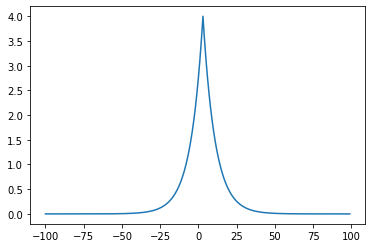

In [68]:
x = np.arange(-100,100,1)
lx = laplace_dist(x, 3, 8)

plt.plot(x, lx)

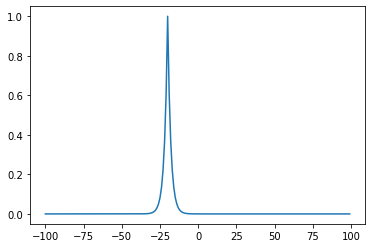

In [69]:
lx = laplace_dist(x, -20, 2)

plt.plot(x, lx)

The Laplace mechanism is widely used in the case of histograms. It consists in adding Laplace noise to each bin in the histogram. The noise is scaled according to 1/$\epsilon$. 

For instance, if we have a bunch of patients with HIV: 

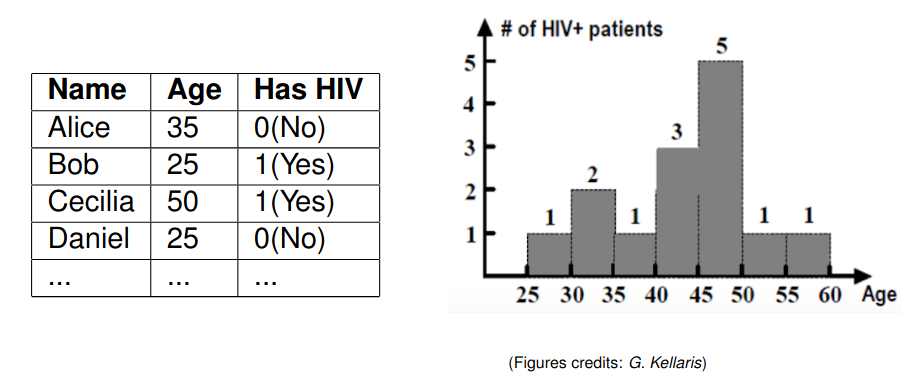





We can add Laplace noise to each bin: 

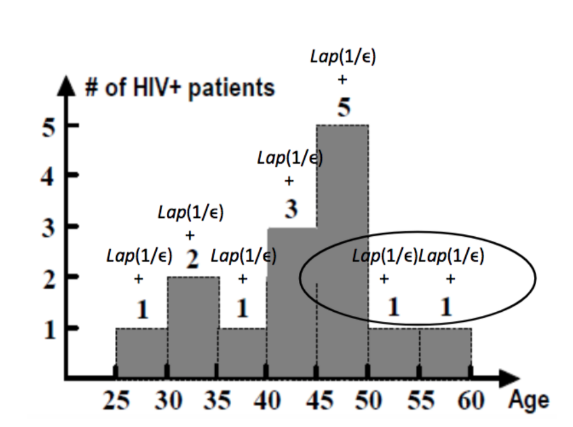

In [92]:
#Let's implement the above example 
age_groups = np.array([1,2,1,3,5,1,1])
epsilon = 1.0
rand_age_groups = [x+np.random.laplace(loc=0.0, scale=1.000/epsilon, size=1) for x in age_groups ]

In [93]:
rand_age_groups

[array([1.12855493]),
 array([0.27257045]),
 array([0.60897352]),
 array([2.93196908]),
 array([4.67958421]),
 array([2.05244436]),
 array([-1.65416387])]

In this case the sensitivity of the query is 1, but we could also have different sensitivity. In that case, the scale becomes Sensitivity / epsilon

If we have to perform a "range query", for instance: knowing the number of patients with HIV from age 25 to 45, the true answer would be 1+2+1+3 = 7 (sum of the first 4 bins). With the Laplace mechanism: 

In [96]:
np.sum(age_groups[0:4]), np.sum(rand_age_groups[0:4])

(7, 4.942067989313612)

If we use an higher epsilon the answer would be more accurate:

In [101]:
#If we use an higher epsilon: 
epsilon = 100.0
rand_age_groups = [x+np.random.laplace(loc=0.0, scale=1.000/epsilon, size=1) for x in age_groups ]

np.sum(age_groups[0:4]), np.sum(rand_age_groups[0:4])

(7, 6.936583745825674)

A lower one would also lower the accuracy: 



In [100]:
epsilon = 0.1
rand_age_groups = [x+np.random.laplace(loc=0.0, scale=1.000/epsilon, size=1) for x in age_groups ]

np.sum(age_groups[0:4]), np.sum(rand_age_groups[0:4])

(7, 43.518874946014634)